In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
df = pd.DataFrame(pd.read_csv("rmse_bne.txt", sep=" "))
#df=df[df['lengthscale']<=0.3]
df.shape

(400, 7)

In [87]:
order = pd.DataFrame(pd.read_csv("rmse_bne.txt", sep=" "))
order = order.sort_values(by=['lengthscale', 'l2regularizer'])
order = order.reset_index(drop=True)
with open("rmse_bne1.txt", 'a') as f:
    dfAsString = order.to_string(header=False, index=False)
    f.write(dfAsString)
order

,lengthscale,l2regularizer,rmse_bma_mean,rmse_bma,rmse_bae,rmse_bne_vo,rmse_bne_vs
0,1.0,1.0,0.90148,0.90148,0.919885,0.893059,0.945146
1,1.0,2.0,0.90148,0.90148,0.914861,0.892809,0.924079
2,1.0,3.0,0.90148,0.90148,0.910664,0.894846,0.914916
3,1.0,4.0,0.90148,0.90148,0.908860,0.896613,0.910970
4,1.0,5.0,0.90148,0.90148,0.906553,0.896418,0.909181
...,...,...,...,...,...,...,...
395,20.0,16.0,0.91794,0.91794,0.892906,0.893054,0.914524
396,20.0,17.0,0.90148,0.90148,0.880023,0.879906,0.904819
397,20.0,18.0,0.91794,0.91794,0.892853,0.892776,0.925423
398,20.0,19.0,0.91794,0.91794,0.892762,0.892781,0.931556


In [88]:
#find the missing one
for i in np.unique(order['lengthscale']):
    print(i)
    #print(df[df['lengthscale']==i].shape)
#print(df[df['lengthscale']==0.25])

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


In [14]:
fig = plt.figure(figsize= (10,5))
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                offset = 0.8,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0.8, np.max(rmse_mean_plot))
# show plot
plt.show()

ValueError: cannot reshape array of size 400 into shape (140,208)

<Figure size 1000x500 with 0 Axes>

In [5]:
print(df[df['rmse_mean']==np.min(df['rmse_mean'])])
print(df[df['rmse_std']==np.min(df['rmse_std'])])

     lengthscale  l2regularizer  rmse_mean  rmse_std
684         0.34           0.25   0.913574  0.441922
     lengthscale  l2regularizer  rmse_mean  rmse_std
384        0.265           0.25   0.999443  0.381198


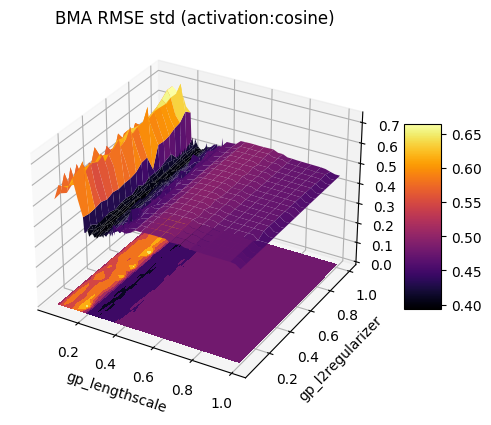

In [6]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

### BNE conservative sweep

In [75]:
def readbnetxt():
    data = []
    with open('rmse_bne1.txt', 'r') as f:
        for line in f.readlines():
            line = line.strip('\n')
            line = line.split()
            data.append(line)
    #print(data)
    return data
df1 = readbnetxt()
# transfer list to dataframe
df1 = pd.DataFrame(df1[1:], columns=df1[0])
df1

,lengthscale,l2regularizer,rmse_mean
0,1.0,1.0,2.002097
1,1.0,2.0,2.053638
2,1.0,3.0,1.979245
3,1.0,4.0,2.039574
4,1.0,5.0,2.031954
...,...,...,...
395,20.0,16.0,1.997812
396,20.0,17.0,1.999456
397,20.0,18.0,2.001682
398,20.0,19.0,2.003692


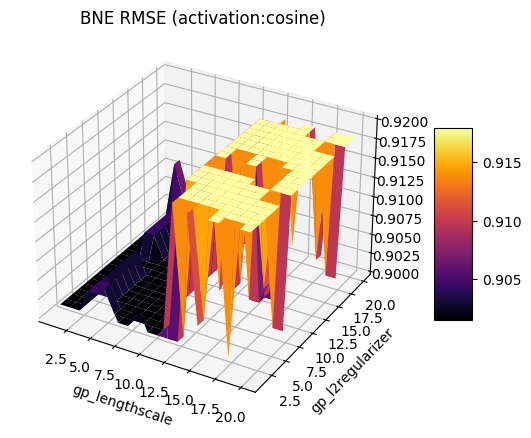

In [94]:
fig = plt.figure(figsize= (10,5))
rmse_bma_mean = order['rmse_bma_mean'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
#rmse_mean_plot = rmse_mean_plot.astype(np.float64)
ax = plt.axes(projection='3d')
x_grid, y_grid = order['lengthscale'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer']))), order['l2regularizer'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
# change the type of x_grid and y_grid to float
#x_grid, y_grid = x_grid.astype(np.float64), y_grid.astype(np.float64)
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_bma_mean, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BNE RMSE (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_bma_mean,
                zdir ='z',
                offset = 0.8,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0.9, 0.92)
# show plot
plt.show()

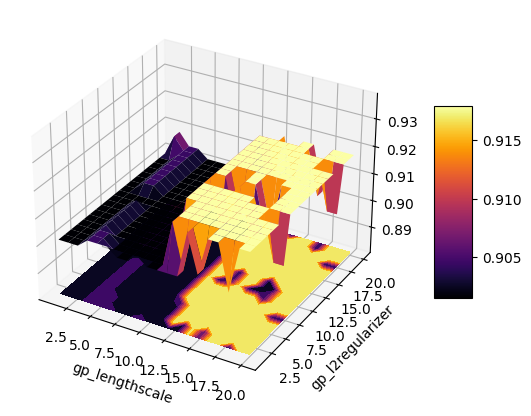

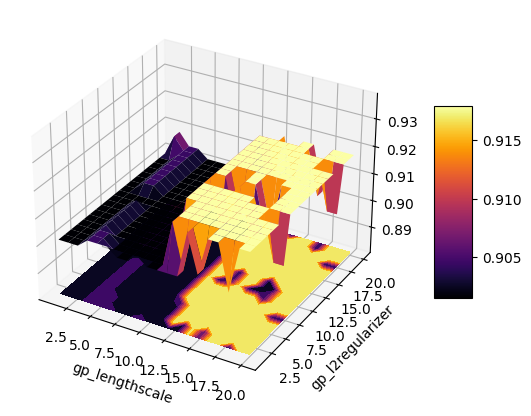

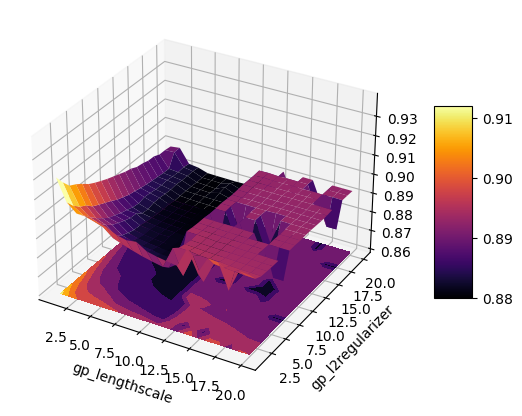

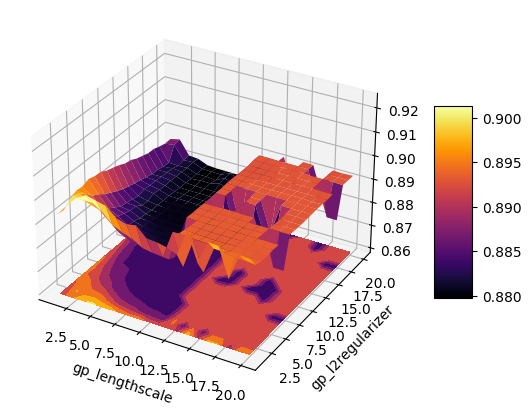

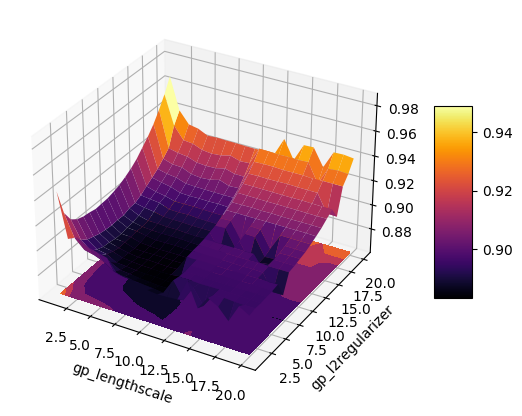

In [114]:
# plot rmse_bma_mean, rmse_bma, rmse_bae, rmse_bne_vo, rmse_bne_vs 

rmse_bma_mean = order['rmse_bma_mean'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bma = order['rmse_bma'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bae = order['rmse_bae'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bne_vo = order['rmse_bne_vo'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bne_vs = order['rmse_bne_vs'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
#rmse_mean_plot = rmse_mean_plot.astype(np.float64)

x_grid, y_grid = order['lengthscale'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer']))), order['l2regularizer'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))

for rmse_name in [rmse_bma_mean, rmse_bma, rmse_bae, rmse_bne_vo, rmse_bne_vs]:
    fig = plt.figure(figsize= (10,5))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_name, cmap='inferno', 
                       edgecolor ='none')
    fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
    #ax.set_title()
    ax.set_xlabel('gp_lengthscale')
    ax.set_ylabel('gp_l2regularizer')
 
    cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_name,
                zdir ='z',
                offset = np.min(rmse_name)-0.02,
                cmap = 'inferno')
    # #cset = ax.contourf(x, y, z,
    #                    zdir ='x',
    #                    offset =-5,
    #                    cmap = my_cmap)
    # #cset = ax.contourf(x, y, z,
    #                    zdir ='y',
    #                    offset = 5,
    #                    cmap = my_cmap)

    ax.set_zlim(np.min(rmse_name)-0.02, np.max(rmse_name)+0.02)
    # show plot
plt.show()            
